The Ornstein–Uhlenbeck process, called the Langevin equation in physics, arose as an attempt to model the velocity of Brownian motion.The process is called **mean-reverting** as there is a tendency, over time, to reach an equilibrium position. The SDE for the Ornstein–Uhlenbeck process is
$$
d X_{t}=-r\left(X_{t}-\mu\right) d t+\sigma B_{t}
$$
let
$$
X_{i+1}=X_{i}-r\left(X_{i}-\mu\right) T / n+\sigma \sqrt{T / n} Z_{i}, \text { for } i=0,1, \ldots, n-1
$$
With $n=1000,$ we generate the process with $X_{0}=2, \mu=-1, r=0.5,$ and $\sigma=0.1 .$ here. We also calculate the expectation of $X_{10}$ here. According to Ito's lemma, we have
$$
E\left(X_{10}\right)=\mu+\left(X_{0}-\mu\right) e^{-r(10)}=-1+3 e^{-5}=-0.9798
$$

In [1]:
from scipy.stats import norm
import numpy as np

X0 = 2
mu = -1
r = 0.5
sigma=0.1
n=1000
T = 10

def O_U_process():
    global X0, mu, r, sigma, n, T
    x = X0
    Xs = [x]
    rv = norm()
    Zs = rv.rvs(size=n-1)
    for i in range(n-1):
        temp = Xs[-1]-r*(Xs[-1]-mu)*(T/n)+sigma*np.sqrt(T/n)*Zs[i]
        Xs.append(temp)
    return Xs    

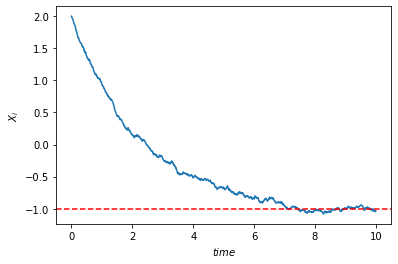

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

simlst = O_U_process()
plt.plot(np.linspace(0,T,n),simlst,'-')
plt.ylabel("$X_i$")
plt.xlabel("$time$")
plt.axhline(y=-1,color='r', linestyle='--')

In [9]:
rep = 10000
x10_mean = 0
for i in range(rep):
    x10_mean+=O_U_process()[-1]
print("the mean of X10 is {}".format(x10_mean/rep))

the mean of X10 is -0.9801175353849685
